# Importing Data


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy
import imblearn.over_sampling
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
from collections import Counter
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier ,plot_tree, export_text
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from keras.layers import Input, Dense

In [ ]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from keras import regularizers
from keras.models import Model, load_model

In [ ]:
from google.colab import files
uploaded = files.upload()
import io

Saving card_transdata.csv to card_transdata.csv


In [ ]:
plt.style.use('ggplot')

# Data Preprocessing

In [ ]:
df.shape

(1000000, 8)

In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723670,11851.104560,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


In [ ]:
df.nunique()

distance_from_home                999971
distance_from_last_transaction    999836
ratio_to_median_purchase_price    999808
repeat_retailer                        2
used_chip                              2
used_pin_number                        2
online_order                           2
fraud                                  2
dtype: int64

In [ ]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

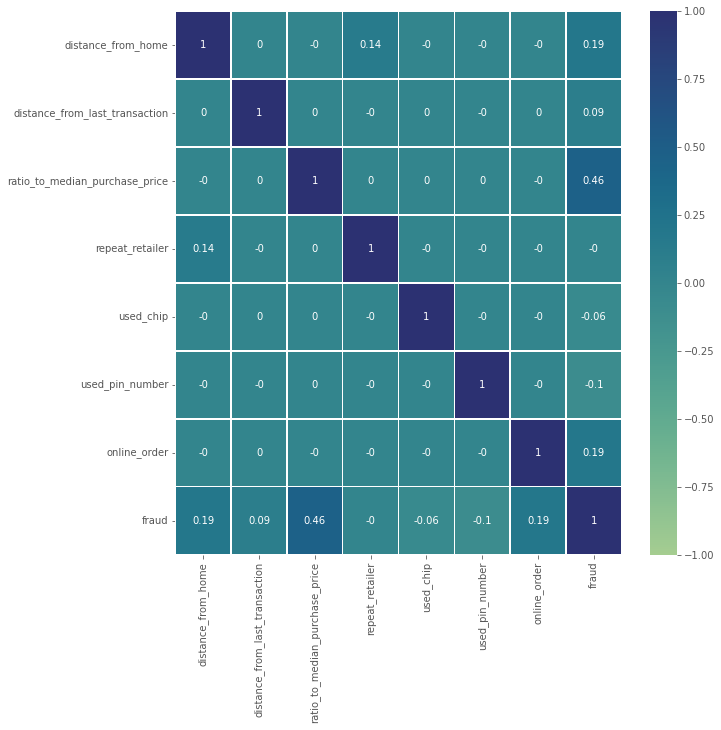

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr().round(2), annot=True, vmin=-1, vmax=1, cmap="crest",linewidth=.5)
plt.show()

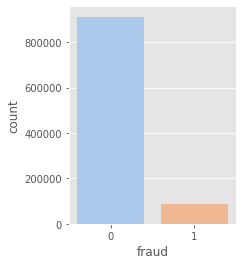

In [ ]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='fraud',data=df,palette="pastel")
plt.show()

In [ ]:
d=round((np.sum(df["fraud"]==1)/len(df["fraud"])*100),2)
print("Percentage of 'Fraud' class is: %s" %(d),"%")

Percentage of 'Fraud' class is: 8.74 %


According to upper output our data is imbalanced, so for split data into train and test parts we should apply "oversampling" or "undersampling".
We choose Undersamplig.


## Calculating Correlations for feature selection

In [ ]:
dfr=df

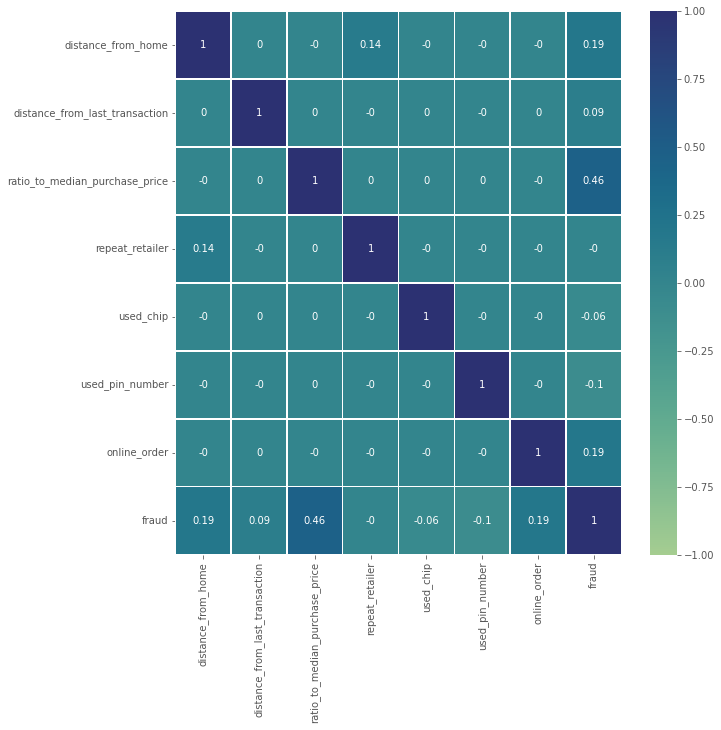

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(dfr.corr().round(2), annot=True, vmin=-1, vmax=1, cmap="crest",linewidth=.5)
plt.show()

according to the correlation plot we can figure out that "repeat retailer" and "distance from last transiction" and"used chip" have very low coorelation with fraud so we can remove theme from dataset.

In [ ]:
feature_columns = ["distance_from_home","ratio_to_median_purchase_price", "used_pin_number", "online_order","fraud"]
df2= dfr[feature_columns]

In [ ]:
fraudf=df2[df2["fraud"]==1]
nfraudf=df2[df2["fraud"]==0]

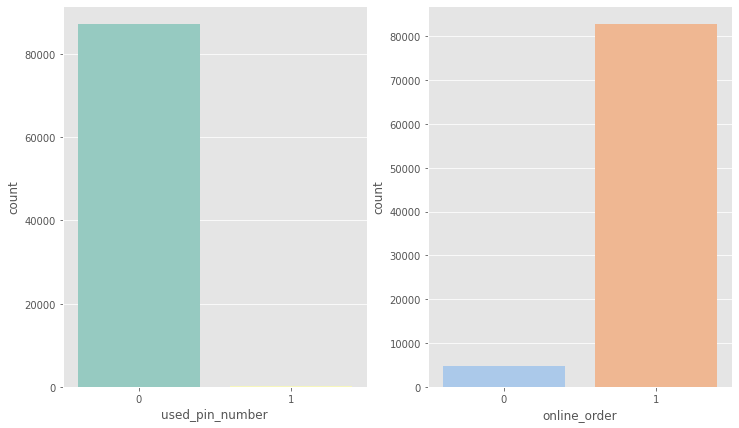

In [ ]:
plt.figure(figsize = (12,7))

plt.subplot(1,2,1)
sns.countplot(x = "used_pin_number", palette = "Set3", data = fraudf)

plt.subplot(1,2,2)
sns.countplot(x = "online_order", palette = "pastel", data = fraudf)

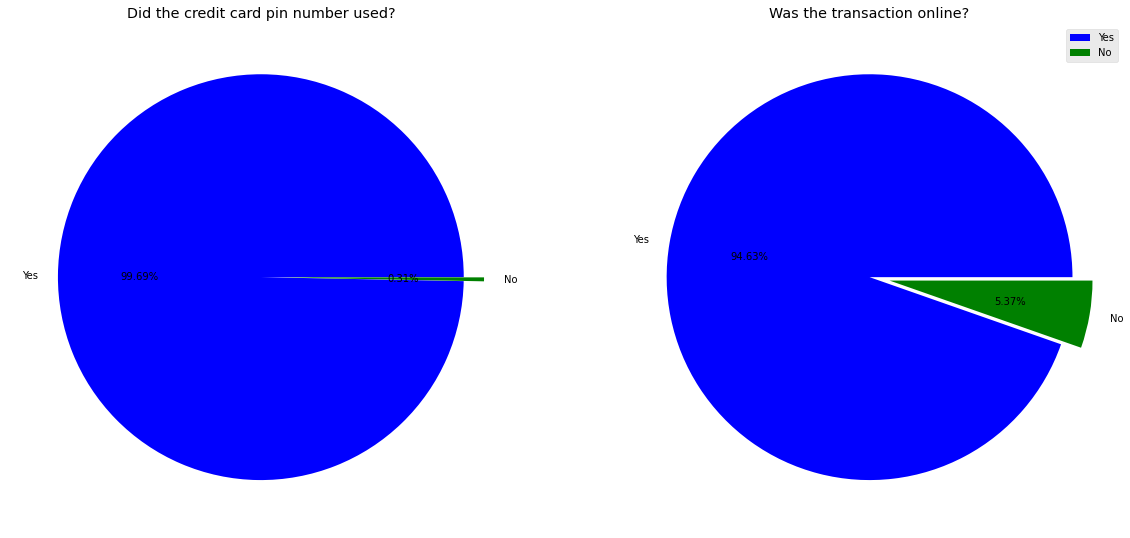

In [ ]:
plt.figure(figsize = (20,20))

plt.subplot(1,2,1)
plt.pie(fraudf["used_pin_number"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1),colors=["blue","green"])
plt.title("Did the credit card pin number used?")

plt.subplot(1,2,2)
plt.pie(fraudf["online_order"].value_counts(), labels = ("Yes", "No"), autopct = "%.2f%%", explode = (0, 0.1),colors=["b","g"])
plt.title("Was the transaction online?")
plt.legend()
plt.show()

When we look at the categoric variables for fraud transactions, we can safely say that almost all of the fraud transactions were online did not use pin number. These key points will be important when creating a model.

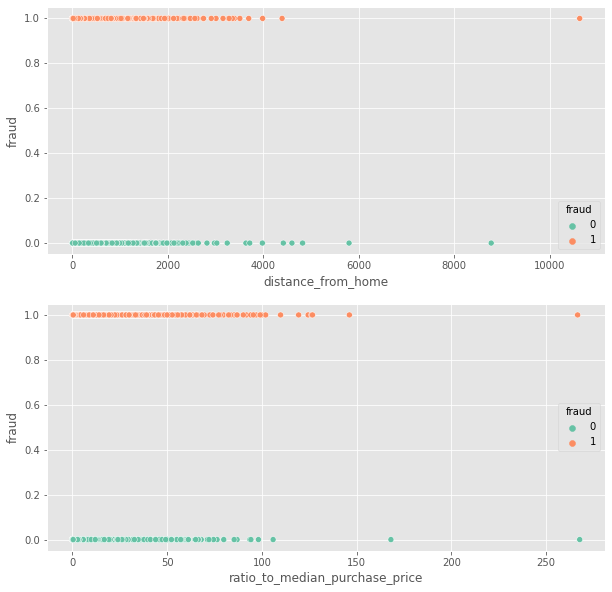

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
sns.scatterplot(y = "fraud", x = "distance_from_home", palette = "Set2", data = df2, hue = "fraud")
plt.subplot(2,1,2)
sns.scatterplot(y = "fraud", x = "ratio_to_median_purchase_price", palette = "Set2", data = df2, hue = "fraud")

There is no significant difference for the non-categoric variables based on their fraud value.



# Split Data to Train and Test Parts

In [ ]:
x = df2.drop("fraud", axis = 1)
y = df2[["fraud"]]

In [ ]:
#Under Sampling without Library
num_fraud=len(fraudf)
non_fraud_indices =nfraudf.index
len(non_fraud_indices)
random_indices = np.random.choice(non_fraud_indices,num_fraud, replace=False)
fraud_indices =fraudf.index
under_sample_indices = np.concatenate([fraud_indices,random_indices])
under_sample = df2.loc[under_sample_indices]

In [ ]:
under_sample

,distance_from_home,ratio_to_median_purchase_price,used_pin_number,online_order,fraud
13,2.131956,6.358667,0,1,1
24,3.803057,1.872950,0,1,1
29,15.694986,0.855623,0,1,1
35,26.711462,4.603601,0,1,1
36,10.664474,4.886521,0,1,1
...,...,...,...,...,...
218459,37.886283,0.908890,0,1,0
506593,11.188643,0.165065,0,1,0
203196,62.806373,0.698852,0,1,0
295188,4.555595,1.279921,0,1,0


In [ ]:
y_fraud_under=under_sample["fraud"]
X_fraud_under=under_sample.drop("fraud",axis="columns")

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_fraud_under, y_fraud_under, test_size=0.2, random_state=39)

In [ ]:
x_fraud_under_df = pd.DataFrame(X_fraud_under, columns=["distance_from_home","ratio_to_median_purchase_price","used_pin_number", "online_order"])
x_fraud_under_df["fraud"]=y_fraud_under
df2=x_fraud_under_df
df2

,distance_from_home,ratio_to_median_purchase_price,used_pin_number,online_order,fraud
13,2.131956,6.358667,0,1,1
24,3.803057,1.872950,0,1,1
29,15.694986,0.855623,0,1,1
35,26.711462,4.603601,0,1,1
36,10.664474,4.886521,0,1,1
...,...,...,...,...,...
218459,37.886283,0.908890,0,1,0
506593,11.188643,0.165065,0,1,0
203196,62.806373,0.698852,0,1,0
295188,4.555595,1.279921,0,1,0


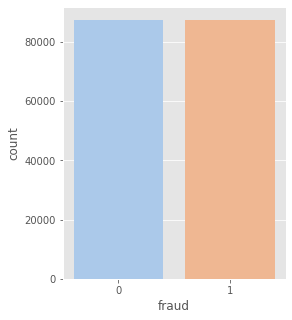

In [ ]:
plt.figure(figsize=(4,5))
sns.countplot(x='fraud',data=df2,palette="pastel")
plt.show()

In [ ]:
df2.corr()

,distance_from_home,ratio_to_median_purchase_price,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.077055,-0.034643,0.053835,0.205642
ratio_to_median_purchase_price,-0.077055,1.000000,-0.088857,0.138445,0.481650
used_pin_number,-0.034643,-0.088857,1.000000,-0.073150,-0.232261
online_order,0.053835,0.138445,-0.073150,1.000000,0.395511
fraud,0.205642,0.481650,-0.232261,0.395511,1.000000


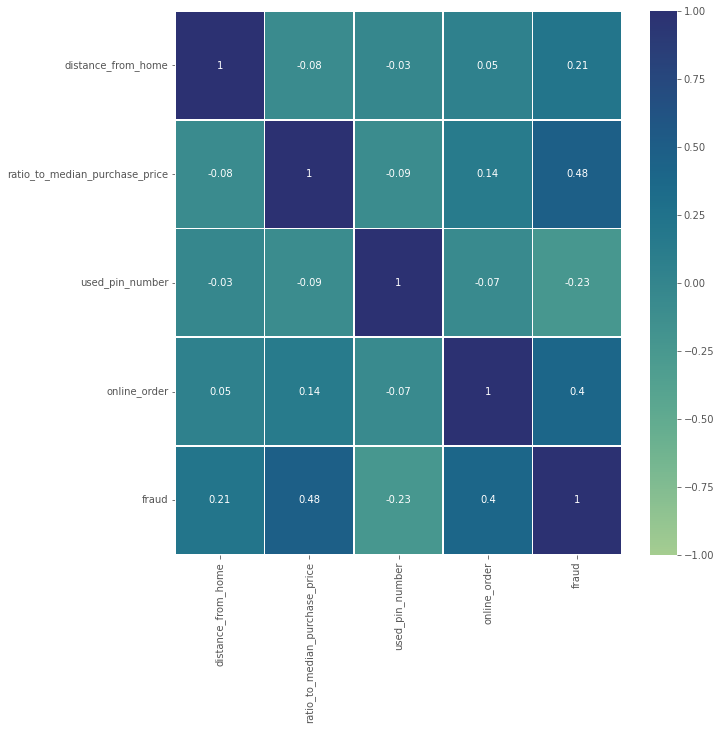

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df2.corr().round(2), annot=True, vmin=-1, vmax=1, cmap="crest",linewidth=.5)
plt.show()

In [ ]:
er_com=pd.DataFrame(columns=["Method Name","Accuracy","Precision","Recall","F1-Score"])
er_com #Error Comparison

,Method Name,Accuracy,Precision,Recall,F1-Score


## Logistic Regression

In [ ]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
print("F1-Score of logistic regression classifier on test set: {:.5f}".format(logreg.score(X_test, y_test)))

F1-Score of logistic regression classifier on test set: 0.91153


In [ ]:
print(confusion_matrix(y_test, y_pred_logreg))

[[15989  1397]
 [ 1696 15880]]


Text(69.0, 0.5, 'Reality')

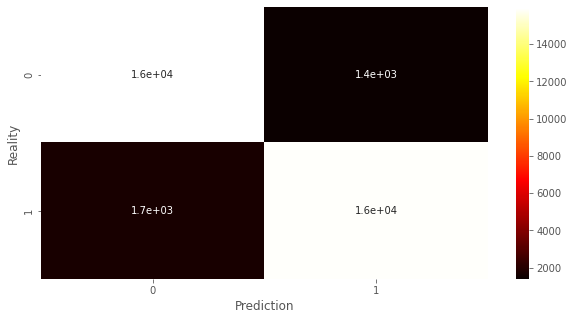

In [ ]:
plt.figure(figsize = (10,5))
cf=confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cf, annot = True, cmap = "hot")
plt.xlabel("Prediction")
plt.ylabel("Reality")

In [ ]:
er_com.loc[len(er_com.index)] = ['Logistic Regression',accuracy_score(y_test, y_pred_logreg),precision_score(y_test, y_pred_logreg),recall_score(y_test, y_pred_logreg),f1_score(y_test, y_pred_logreg)]

In [ ]:
print("The model accuracy is : ",accuracy_score(y_test, y_pred_logreg))
print("The model precision is: ",precision_score(y_test, y_pred_logreg))
print("The model recall score is :",recall_score(y_test, y_pred_logreg))
print("The f1-score is: " ,f1_score(y_test, y_pred_logreg))

The model accuracy is :  0.9115325210228248
The model precision is:  0.9191410545812352
The model recall score is : 0.9035047792444242
The f1-score is:  0.9112558459816946


## Decesion Tree

In [ ]:
depth = np.arange(5, 15)
train_accuracy = np.empty(len(depth))
test_accuracy = np.empty(len(depth))

for i, k in enumerate(depth):
    clf = DecisionTreeClassifier(max_depth=k)
    clf.fit(X_train, y_train)
    train_accuracy[i] = clf.score(X_train, y_train)
    test_accuracy[i] = clf.score(X_test, y_test)

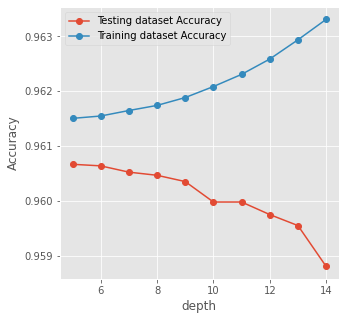

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(depth, test_accuracy, label = "Testing dataset Accuracy",marker="o")
plt.plot(depth, train_accuracy, label = "Training dataset Accuracy",marker="o")

plt.legend()
plt.xlabel("depth")
plt.ylabel("Accuracy")
plt.show()

after depth=10, the train dataset accuarcy increas and in the opposite test dataset accuracy starts to decreas and we model will be "overfit".
SO we choose depth=10 for best choise.

In [ ]:
clf = DecisionTreeClassifier(random_state=0,max_depth=8)
clf = clf.fit(X_train,y_train)
y_pred_dectree= clf.predict(X_test)

In [ ]:
confusion_matrix_decision = confusion_matrix(y_test, y_pred_dectree)
print(confusion_matrix_decision)

[[17192   194]
 [ 1188 16388]]


In [ ]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 4.00
|   |--- feature_0 <= 99.98
|   |   |--- feature_3 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.50
|   |   |   |--- feature_2 <= 0.50
|   |   |   |   |--- feature_0 <= 1.90
|   |   |   |   |   |--- feature_0 <= 0.19
|   |   |   |   |   |   |--- feature_0 <= 0.18
|   |   |   |   |   |   |   |--- feature_1 <= 0.92
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  0.92
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  0.18
|   |   |   |   |   |   |   |--- feature_0 <= 0.18
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  0.18
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  0.19
|   |   |   |   |   |   |--- feature_0 <= 0.26
|   |   |   |   |   |   |   |--- feature_1 <= 0.34
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  0.34
|   |   |   |   |   |   

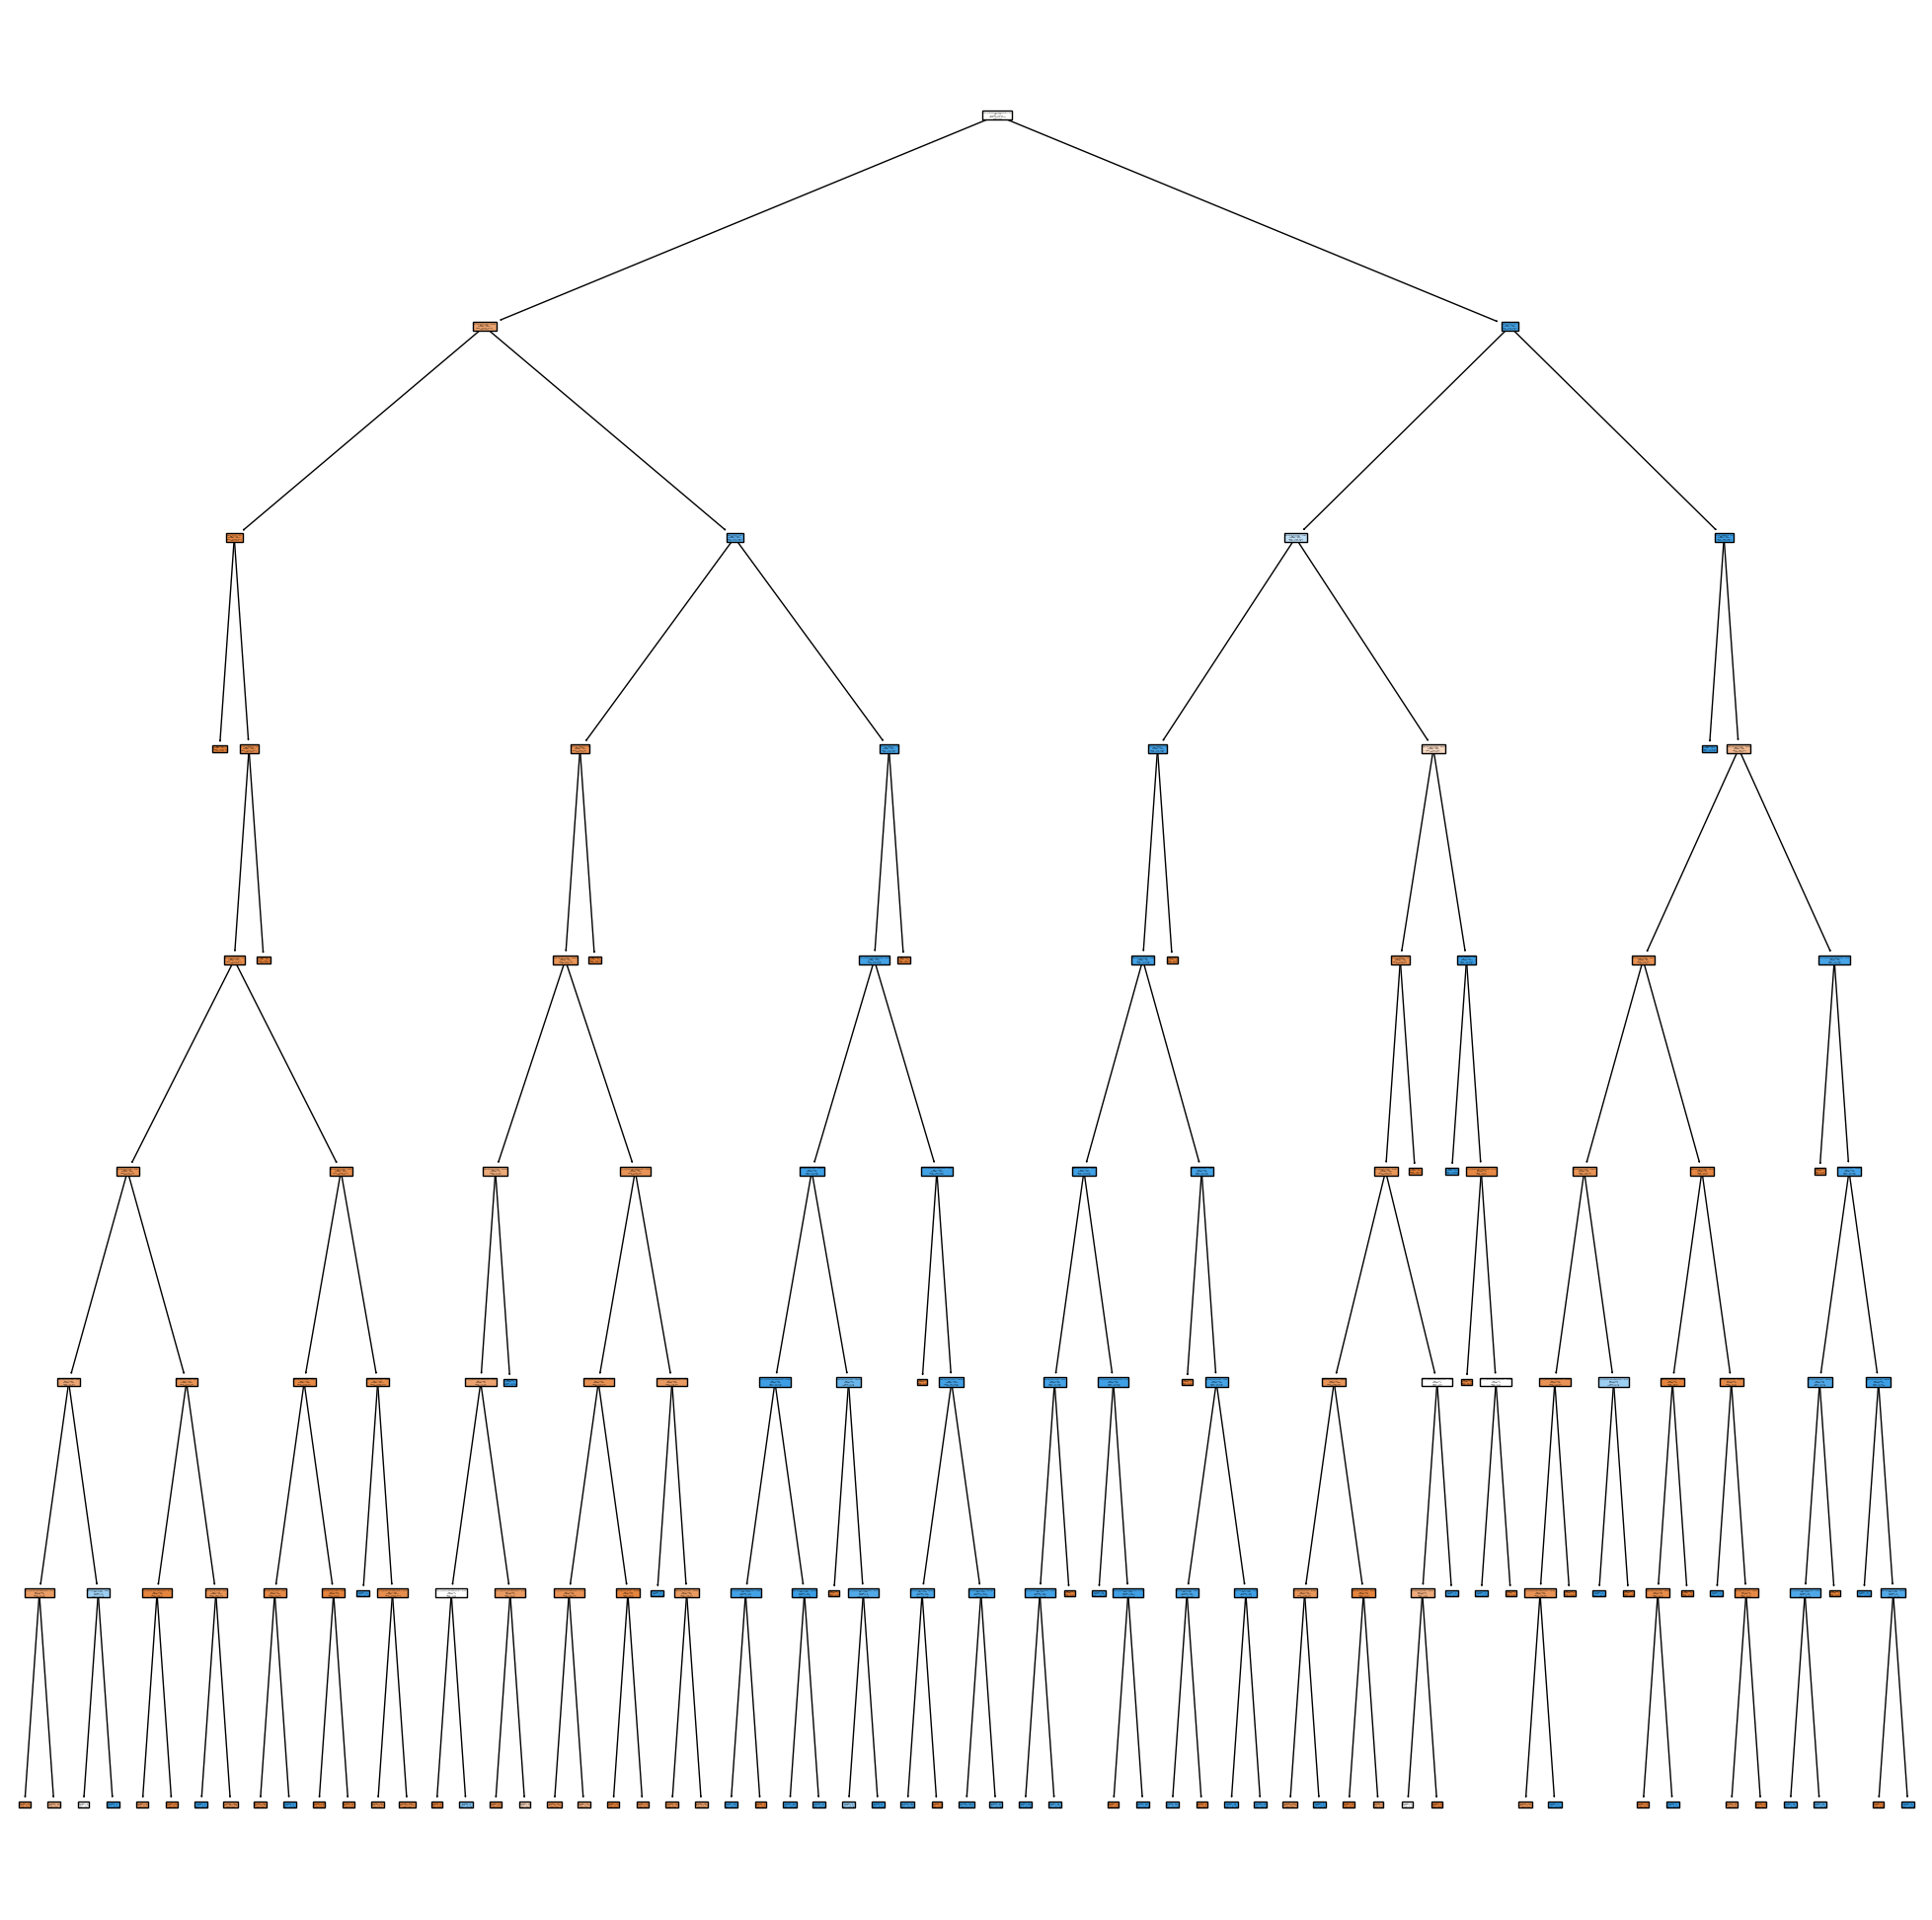

In [ ]:
fig = plt.figure(figsize=(25,25))
dtp=tree.plot_tree(clf,feature_names=feature_columns,class_names=["frad","not fraud"],filled=True)

In [ ]:
er_com.loc[len(er_com.index)] = ['Decision Tree',accuracy_score(y_test, y_pred_dectree),precision_score(y_test, y_pred_dectree),recall_score(y_test, y_pred_dectree),f1_score(y_test, y_pred_dectree)]

In [ ]:
print("The model accuracy is : ",accuracy_score(y_test, y_pred_dectree))
print("The model precision is: ",precision_score(y_test, y_pred_dectree))
print("The model recall score is :",recall_score(y_test, y_pred_dectree))
print("The f1-score is: " ,f1_score(y_test, y_pred_dectree))

The model accuracy is :  0.9604713689148218
The model precision is:  0.9883005668797491
The model recall score is : 0.932407828857533
The f1-score is:  0.9595409567304877


Text(95.72222222222221, 0.5, 'Reality')

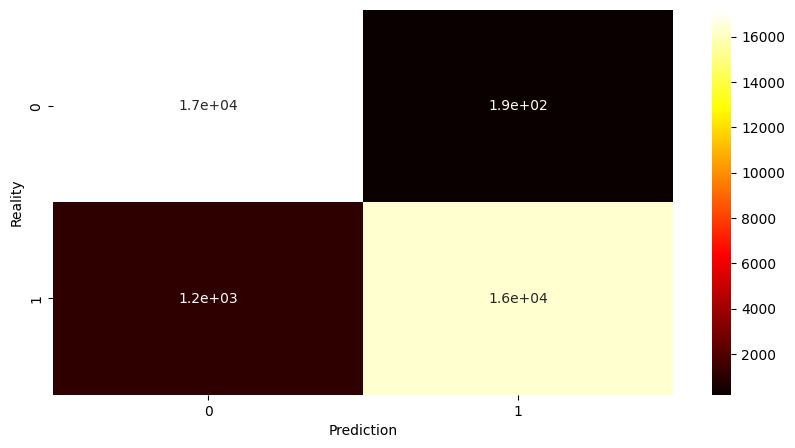

In [ ]:
plt.figure(figsize = (10,5))
cf=confusion_matrix(y_test, y_pred_dectree)
sns.heatmap(cf, annot = True, cmap = "hot")
plt.xlabel("Prediction")
plt.ylabel("Reality")

In [ ]:
er_com

,Method Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.911533,0.919141,0.903505,0.911256
1,Decision Tree,0.960471,0.988301,0.932408,0.959541


## K-NN

In [ ]:
neighbors = np.arange(3, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy= np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

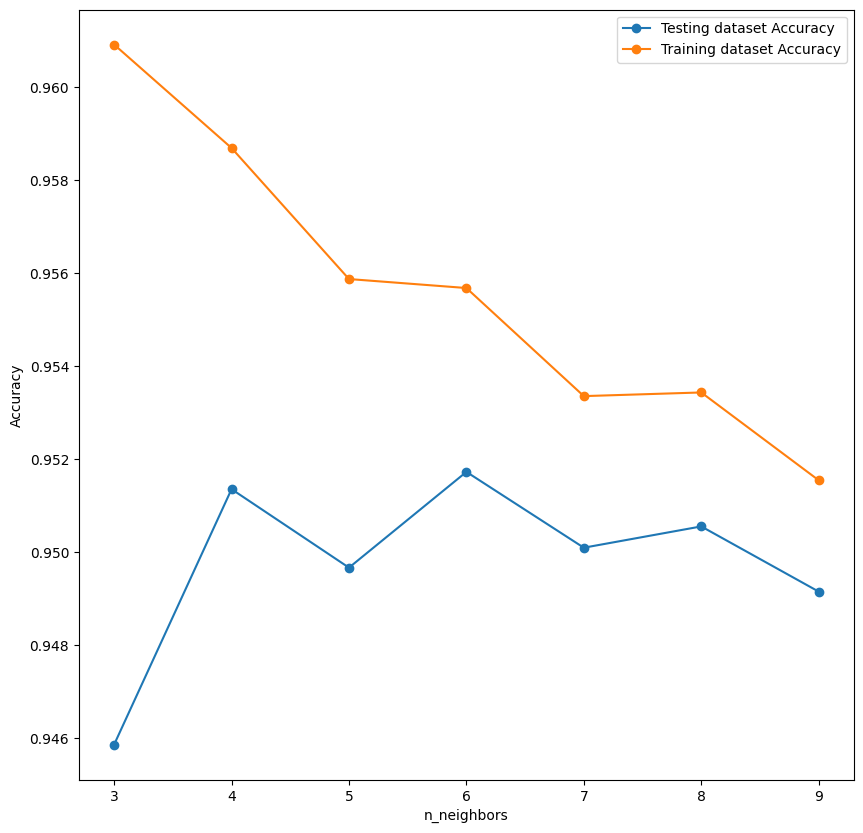

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(neighbors, test_accuracy, label = "Testing dataset Accuracy",marker="o")
plt.plot(neighbors, train_accuracy, label = "Training dataset Accuracy",marker="o")

plt.legend()
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()

4 Neighbors is the best choice for model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_knn))

[[16918   468]
 [ 1233 16343]]


In [ ]:
print("The model accuracy is : ",accuracy_score(y_test, y_pred_knn))
print("The model precision is: ",precision_score(y_test, y_pred_knn))
print("The model recall score is :",recall_score(y_test, y_pred_knn))
print("The f1-score is: " ,f1_score(y_test, y_pred_knn))

The model accuracy is :  0.951347176934958
The model precision is:  0.9721610850038666
The model recall score is : 0.9298475193445608
The f1-score is:  0.9505336318957747


In [ ]:
er_com.loc[len(er_com.index)] = ['K-NN',accuracy_score(y_test, y_pred_knn),precision_score(y_test, y_pred_knn),recall_score(y_test, y_pred_knn),f1_score(y_test, y_pred_knn)]

Text(95.72222222222221, 0.5, 'Reality')

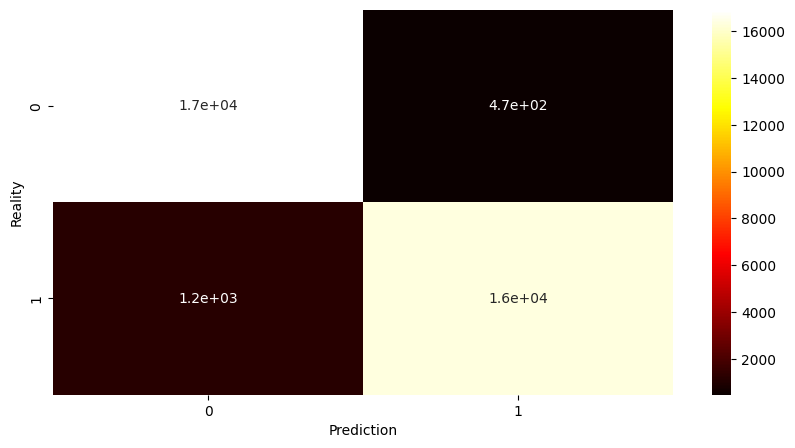

In [ ]:
plt.figure(figsize = (10,5))
cf=confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf, annot = True, cmap = "hot")
plt.xlabel("Prediction")
plt.ylabel("Reality")

In [ ]:
er_com

,Method Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.911533,0.919141,0.903505,0.911256
1,Decision Tree,0.960471,0.988301,0.932408,0.959541
2,K-NN,0.951347,0.972161,0.929848,0.950534


# SVM

In [ ]:
model_svm=SVC(C=1,degree=3,kernel="poly")

In [ ]:
model_svm.fit(X_train,y_train)

SVC(C=1, kernel='poly')

In [ ]:
y_pred_svm = model_svm.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_svm))

[[14127   242]
 [10989  3392]]


In [ ]:
print("The model accuracy is : ",accuracy_score(y_test, y_pred_svm))
print("The model precision is: ",precision_score(y_test, y_pred_svm))
print("The model recall score is :",recall_score(y_test, y_pred_svm))
print("The f1-score is: " ,f1_score(y_test, y_pred_svm))

The model accuracy is :  0.6093565217391305
The model precision is:  0.9334067143643369
The model recall score is : 0.23586676865308392
The f1-score is:  0.37657507632528453


In [ ]:
er_com.loc[len(er_com.index)] = ['SVM',accuracy_score(y_test, y_pred_svm),precision_score(y_test, y_pred_svm),recall_score(y_test, y_pred_svm),f1_score(y_test, y_pred_er_com.loc[len(er_com.index)] = ['Decision Tree',accuracy_score(y_test, y_pred_dectree),precision_score(y_test, y_pred_dectree),recall_score(y_test, y_pred_dectree),f1_score(y_test, y_pred_dectree)])]

# Random Forest

In [ ]:
rf = RandomForestClassifier(max_depth=10,random_state =5)
param_grid = {'n_estimators': [15,50,75,100]}
gs=GridSearchCV(rf,param_grid,scoring="f1",cv=7)
gs.fit(X_train, y_train)
print(gs.best_params_)

{'n_estimators': 50}


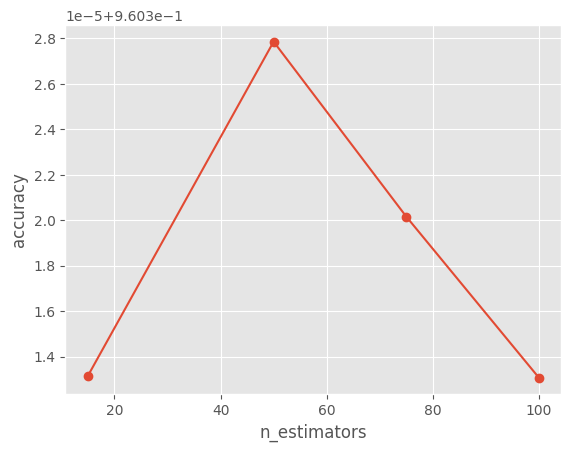

In [ ]:
n_estimators=[15,50,75,100]
scores = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, scores,marker="o")
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.show()

In [ ]:
y_pred_rf= gs.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred_rf))

[[17195   191]
 [ 1185 16391]]


In [ ]:
print("The model accuracy is : ",accuracy_score(y_test, y_pred_rf))
print("The model precision is: ",precision_score(y_test, y_pred_rf))
print("The model recall score is :",recall_score(y_test, y_pred_rf))
print("The f1-score is: " ,f1_score(y_test, y_pred_rf))

The model accuracy is :  0.9606429838109948
The model precision is:  0.988481485948619
The model recall score is : 0.9325785161583978
The f1-score is:  0.959716611042801


In [ ]:
er_com.loc[len(er_com.index)] = ['Random Forest',accuracy_score(y_test, y_pred_rf),precision_score(y_test, y_pred_rf),recall_score(y_test, y_pred_rf),f1_score(y_test, y_pred_rf)]

Text(120.72222222222221, 0.5, 'Reality')

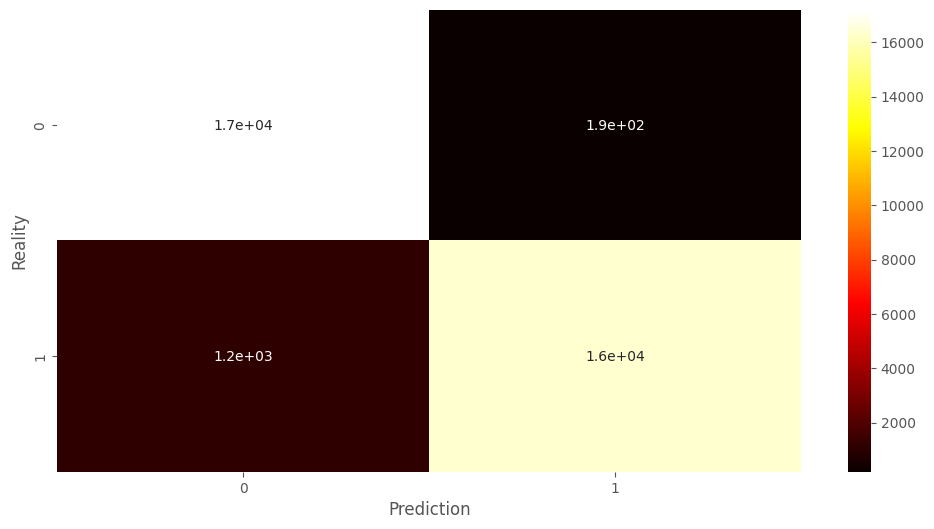

In [ ]:
plt.figure(figsize = (12,6))
cf=confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cf, annot = True, cmap = "hot")
plt.xlabel("Prediction")
plt.ylabel("Reality")

In [ ]:
er_com

,Method Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.911533,0.919141,0.903505,0.911256
1,Decision Tree,0.960471,0.988301,0.932408,0.959541
2,K-NN,0.951347,0.972161,0.929848,0.950534
3,Random Forest,0.960643,0.988481,0.932579,0.959717


## Neural Network

In [ ]:
# Specify hyperparameters for ANN
EPOCHS = 15
callback = EarlyStopping(monitor='loss', min_delta=0.01, patience=10)
POOL_CHOICE = layers.AveragePooling2D
PADDING_CHOICE = 'valid'
KERNEL_SIZE = (5,5)
POOL_SIZE = (2,2)
ACT_FUNC =keras.activations.relu
OPT = keras.optimizers.Adam
LOSS_FUNC = keras.losses.categorical_crossentropy
METRICS = ['accuracy','mse', 'mae']
keras.metrics.Precision(), keras.metrics.Recall()
OUTPUT_PATH = './'
CLASS_NAMES = ['Valid', 'Fraud']

In [ ]:
def plot_training_history(training_history, file_name = None):
    loss_history = training_history.history['loss']
    acc_history = training_history.history['accuracy']
    mse_history = training_history.history['mse']
    mae_history = training_history.history['mae']

    # Define plot size, approximately 1024x1024 pixels 
    dpi = 300
    num_of_pixels = 1024
    num_of_inches = num_of_pixels / dpi
    cm = num_of_inches * 2.54

    plt.gcf().set_dpi(dpi)
    fig = plt.figure(figsize=(cm,cm))
    plt.subplots_adjust(hspace=0.3)
    
    axs11 = fig.add_subplot(2,2,1)
    axs12 = fig.add_subplot(2,2,2)
    axs21 = fig.add_subplot(2,2,3)
    axs22 = fig.add_subplot(2,2,4)
    
    fig.suptitle('Training Metrics - ' + file_name if file_name is not None else '')

    x_ticks = np.arange(1, len(loss_history), 2)
    for axs in (axs11, axs12, axs21, axs22):
        axs.set_xlabel('epochs')
        axs.set_xticks(x_ticks)
        
    axs11.plot(loss_history)
    axs11.set_title('Loss')
    axs12.plot(acc_history)
    axs12.set_title('Accuracy')
    axs21.plot(mse_history)
    axs21.set_title('MSE')
    axs22.plot(mae_history)
    axs22.set_title('MAE')

    plt.show()

In [ ]:
def conf_matrix_and_classification_report(y_true, y_pred, num_of_classes = 10, class_names = None):
    if class_names is None:
        class_names = [str(i) for i in range(num_of_classes)]
    
    conf_matrix = sklearn.metrics.confusion_matrix(y_true, y_pred)
    for i in range(len(conf_matrix)):
        print(class_names[i] + ':', conf_matrix[i])
    print('-----------------------------------------------------')
    # Print the precision and recall, among other metrics
    print(sklearn.metrics.classification_report(y_true, y_pred, target_names = class_names)) # output_dict=True, for not rounding

ANN1

In [ ]:
# Define structure of the ANN Structure
keras.backend.clear_session()
MODEL_NAME_ANN= "ANN"
model_ANN = models.Sequential(name = MODEL_NAME_ANN)

model_ANN.add(layers.Dense(100, input_shape = (X_train.shape[1],), activation=ACT_FUNC))
model_ANN.add(layers.Dense(200, activation=ACT_FUNC))
model_ANN.add(layers.Dense(300, activation=ACT_FUNC))
model_ANN.add(layers.Dense(300, activation=ACT_FUNC))
model_ANN.add(layers.Dense(200, activation=ACT_FUNC))
model_ANN.add(layers.Dense(100, activation=ACT_FUNC))
model_ANN.add(layers.Dense(50, activation=ACT_FUNC))
model_ANN.add(layers.Dense(25, activation=ACT_FUNC))
model_ANN.add(layers.Dense(10, activation=ACT_FUNC))
model_ANN.add(layers.Dense(2, activation='softmax'))

model_ANN.compile(optimizer =OPT(), loss = LOSS_FUNC, metrics = METRICS)
model_ANN.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               500       
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 dense_2 (Dense)             (None, 300)               60300     
                                                                 
 dense_3 (Dense)             (None, 300)               90300     
                                                                 
 dense_4 (Dense)             (None, 200)               60200     
                                                                 
 dense_5 (Dense)             (None, 100)               20100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050    

In [ ]:
training_history_ANN = model_ANN.fit(X_train, to_categorical(y_train), epochs = EPOCHS)

Epoch 1/15
4371/4371 [==============================] - 23s 5ms/step - loss: 0.2530 - accuracy: 0.9119 - mse: 0.0724 - mae: 0.1499
Epoch 2/15
4371/4371 [==============================] - 32s 7ms/step - loss: 0.1792 - accuracy: 0.9423 - mse: 0.0494 - mae: 0.1010
Epoch 3/15
4371/4371 [==============================] - 30s 7ms/step - loss: 0.1683 - accuracy: 0.9466 - mse: 0.0463 - mae: 0.0933
Epoch 4/15
4371/4371 [==============================] - 23s 5ms/step - loss: 0.1552 - accuracy: 0.9512 - mse: 0.0426 - mae: 0.0855
Epoch 5/15
4371/4371 [==============================] - 25s 6ms/step - loss: 0.1548 - accuracy: 0.9515 - mse: 0.0423 - mae: 0.0850
Epoch 6/15
4371/4371 [==============================] - 23s 5ms/step - loss: 0.1507 - accuracy: 0.9531 - mse: 0.0412 - mae: 0.0829
Epoch 7/15
4371/4371 [==============================] - 21s 5ms/step - loss: 0.1574 - accuracy: 0.9513 - mse: 0.0427 - mae: 0.0859
Epoch 8/15
4371/4371 [==============================] - 21s 5ms/step - loss: 0.1574

<Figure size 1920x1440 with 0 Axes>

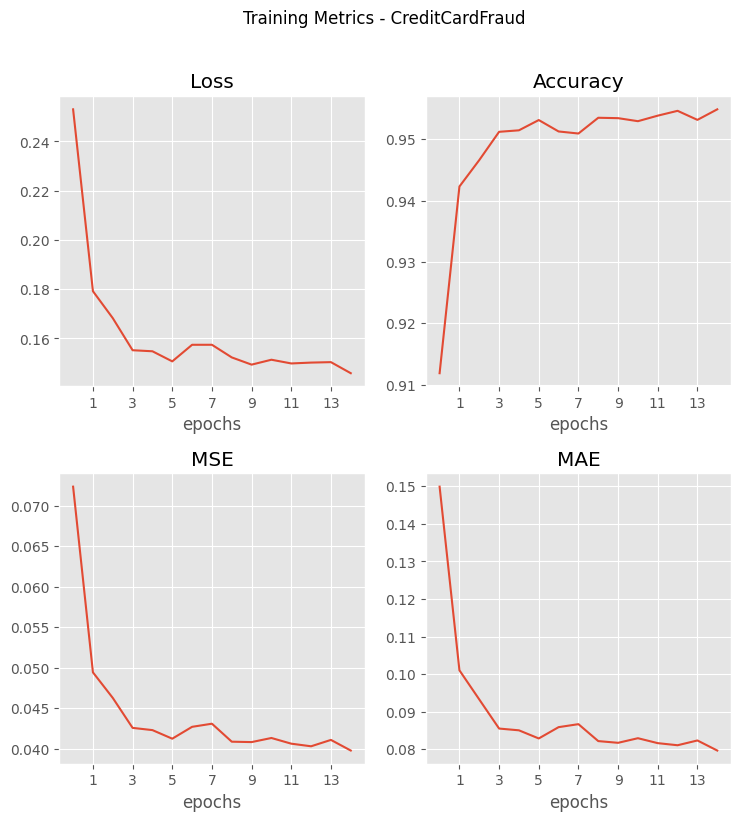

In [ ]:
plot_training_history(training_history_ANN, file_name='CreditCardFraud')

In [ ]:
print(f'Detailed Training Results of {MODEL_NAME_ANN} model')
y_pred_1hot_ann = model_ANN.predict(X_test)
y_pred_ann = np.argmax(y_pred_1hot_ann, axis = 1)
conf_matrix_and_classification_report(y_test, y_pred_ann, class_names=CLASS_NAMES)

Detailed Training Results of ANN model
1093/1093 [==============================] - 2s 2ms/step
Valid: [16962   424]
Fraud: [ 1195 16381]
-----------------------------------------------------
              precision    recall  f1-score   support

       Valid       0.93      0.98      0.95     17386
       Fraud       0.97      0.93      0.95     17576

    accuracy                           0.95     34962
   macro avg       0.95      0.95      0.95     34962
weighted avg       0.95      0.95      0.95     34962



In [ ]:
acc_history = training_history_ANN.history['accuracy']
er_com.loc[len(er_com.index)] = ['ANN1',accuracy_score(y_test, y_pred_ann),precision_score(y_test, y_pred_ann),recall_score(y_test, y_pred_ann),f1_score(y_test, y_pred_ann)]

In [ ]:
er_com

,Method Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.911533,0.919141,0.903505,0.911256
1,Decision Tree,0.960471,0.988301,0.932408,0.959541
2,K-NN,0.951347,0.972161,0.929848,0.950534
3,Random Forest,0.960643,0.988481,0.932579,0.959717
4,ANN1,0.953693,0.974769,0.932010,0.952910


In [ ]:
ann_viz(model_ANN, title="ANN1",view=True,filename="visualized1")

ANN2

In [ ]:
# Define structure of the ANN with structure
keras.backend.clear_session()
MODEL_NAME_ANN="ANN"
model_ANN = models.Sequential(name = MODEL_NAME_ANN)

model_ANN.add(layers.Dense(50, input_shape = (X_train.shape[1],), activation=ACT_FUNC))
model_ANN.add(layers.Dense(100, activation=ACT_FUNC))
model_ANN.add(layers.Dense(200, activation=ACT_FUNC))
model_ANN.add(layers.Dense(200, activation=ACT_FUNC))
model_ANN.add(layers.Dense(50, activation=ACT_FUNC))
model_ANN.add(layers.Dense(2, activation='softmax'))

model_ANN.compile(optimizer =OPT(), loss = LOSS_FUNC, metrics = METRICS)
model_ANN.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                250       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 200)               20200     
                                                                 
 dense_3 (Dense)             (None, 200)               40200     
                                                                 
 dense_4 (Dense)             (None, 50)                10050     
                                                                 
 dense_5 (Dense)             (None, 2)                 102       
                                                                 
Total params: 75,902
Trainable params: 75,902
Non-trainable par

In [ ]:
training_history_ANN = model_ANN.fit(X_train, to_categorical(y_train), epochs = EPOCHS)

Epoch 1/15
4371/4371 [==============================] - 12s 3ms/step - loss: 0.2335 - accuracy: 0.9200 - mse: 0.0651 - mae: 0.1322
Epoch 2/15
4371/4371 [==============================] - 13s 3ms/step - loss: 0.1725 - accuracy: 0.9445 - mse: 0.0475 - mae: 0.0966
Epoch 3/15
4371/4371 [==============================] - 12s 3ms/step - loss: 0.1584 - accuracy: 0.9494 - mse: 0.0435 - mae: 0.0878
Epoch 4/15
4371/4371 [==============================] - 11s 3ms/step - loss: 0.1531 - accuracy: 0.9520 - mse: 0.0418 - mae: 0.0841
Epoch 5/15
4371/4371 [==============================] - 11s 3ms/step - loss: 0.1487 - accuracy: 0.9537 - mse: 0.0407 - mae: 0.0819
Epoch 6/15
4371/4371 [==============================] - 11s 3ms/step - loss: 0.1475 - accuracy: 0.9541 - mse: 0.0403 - mae: 0.0810
Epoch 7/15
4371/4371 [==============================] - 12s 3ms/step - loss: 0.1460 - accuracy: 0.9548 - mse: 0.0398 - mae: 0.0800
Epoch 8/15
4371/4371 [==============================] - 12s 3ms/step - loss: 0.1461

<Figure size 1920x1440 with 0 Axes>

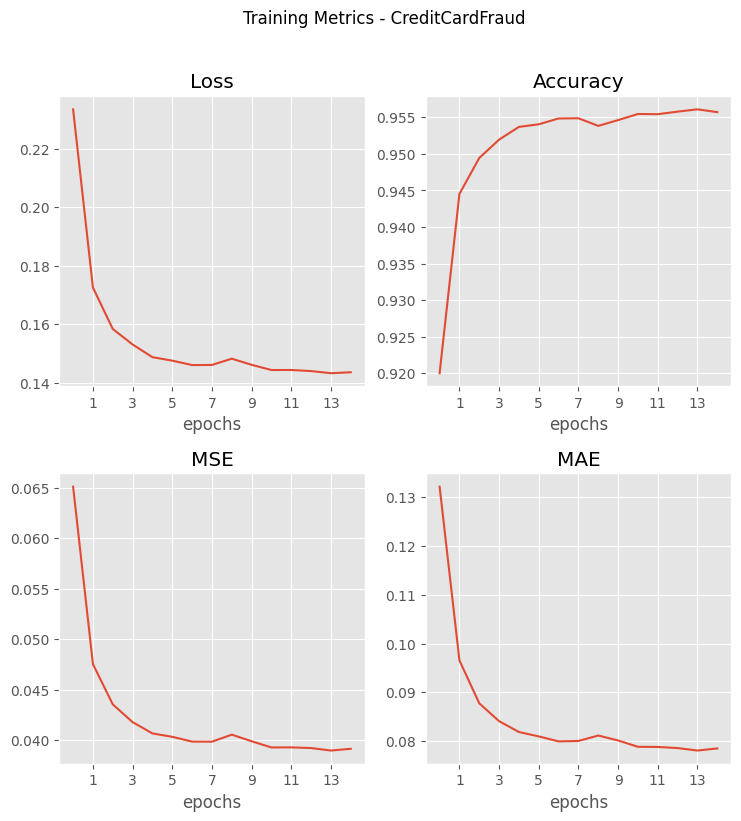

In [ ]:
plot_training_history(training_history_ANN, file_name='CreditCardFraud')

In [ ]:
print(f'Detailed Training Results of {MODEL_NAME_ANN} model')
y_pred_1hot_ann = model_ANN.predict(X_test)
y_pred_ann = np.argmax(y_pred_1hot_ann, axis = 1)
conf_matrix_and_classification_report(y_test, y_pred_ann, class_names=CLASS_NAMES)

Detailed Training Results of ANN model
1093/1093 [==============================] - 2s 1ms/step
Valid: [16892   494]
Fraud: [ 1159 16417]
-----------------------------------------------------
              precision    recall  f1-score   support

       Valid       0.94      0.97      0.95     17386
       Fraud       0.97      0.93      0.95     17576

    accuracy                           0.95     34962
   macro avg       0.95      0.95      0.95     34962
weighted avg       0.95      0.95      0.95     34962



In [ ]:
print("The model accuracy is : ",accuracy_score(y_test, y_pred_ann))
print("The model precision is: ",precision_score(y_test, y_pred_ann))
print("The model recall score is :",recall_score(y_test, y_pred_ann))
print("The f1-score is: " ,f1_score(y_test, y_pred_ann))

The model accuracy is :  0.9527200961043418
The model precision is:  0.9707882443380048
The model recall score is : 0.9340578060992262
The f1-score is:  0.9520688955258503


In [ ]:
acc_history = training_history_ANN.history['accuracy']
er_com.loc[len(er_com.index)] = ['ANN2',accuracy_score(y_test, y_pred_ann),precision_score(y_test, y_pred_ann),recall_score(y_test, y_pred_ann),f1_score(y_test, y_pred_ann)]

In [ ]:
ann_viz(model_ANN, title="ANN2",view=True,filename="visualized2")

ANN3

In [ ]:
# Define structure of the ANN structure
keras.backend.clear_session()
ACT_FUNC=keras.activations.relu
MODEL_NAME_ANN="ANN"
model_ANN = models.Sequential(name = MODEL_NAME_ANN)

model_ANN.add(layers.Dense(32, input_shape = (X_train.shape[1],), activation=ACT_FUNC))
model_ANN.add(layers.Dense(64, activation=ACT_FUNC))
model_ANN.add(layers.Dense(128, activation=ACT_FUNC))
model_ANN.add(layers.Dense(256, activation=ACT_FUNC))
model_ANN.add(layers.Dense(512, activation=ACT_FUNC))
model_ANN.add(layers.Dense(256, activation=ACT_FUNC))
model_ANN.add(layers.Dense(128, activation=ACT_FUNC))
model_ANN.add(layers.Dense(64, activation=ACT_FUNC))
model_ANN.add(layers.Dense(32, activation=ACT_FUNC))
model_ANN.add(layers.Dense(2, activation='softmax'))

model_ANN.compile(optimizer =OPT(), loss = LOSS_FUNC, metrics = METRICS)
model_ANN.summary()

Model: "ANN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 512)               131584    
                                                                 
 dense_5 (Dense)             (None, 256)               131328    
                                                                 
 dense_6 (Dense)             (None, 128)               32896   

In [ ]:
training_history_ANN = model_ANN.fit(X_train, to_categorical(y_train), epochs = EPOCHS)

Epoch 1/15
4371/4371 [==============================] - 24s 5ms/step - loss: 0.2130 - accuracy: 0.9279 - mse: 0.0601 - mae: 0.1224
Epoch 2/15
4371/4371 [==============================] - 23s 5ms/step - loss: 0.1794 - accuracy: 0.9416 - mse: 0.0500 - mae: 0.1008
Epoch 3/15
4371/4371 [==============================] - 23s 5ms/step - loss: 0.1664 - accuracy: 0.9465 - mse: 0.0461 - mae: 0.0928
Epoch 4/15
4371/4371 [==============================] - 23s 5ms/step - loss: 0.1664 - accuracy: 0.9467 - mse: 0.0460 - mae: 0.0926
Epoch 5/15
4371/4371 [==============================] - 23s 5ms/step - loss: 0.1603 - accuracy: 0.9488 - mse: 0.0442 - mae: 0.0889
Epoch 6/15
4371/4371 [==============================] - 23s 5ms/step - loss: 0.1568 - accuracy: 0.9504 - mse: 0.0433 - mae: 0.0868
Epoch 7/15
4371/4371 [==============================] - 23s 5ms/step - loss: 0.1526 - accuracy: 0.9521 - mse: 0.0419 - mae: 0.0841
Epoch 8/15
4371/4371 [==============================] - 24s 6ms/step - loss: 0.1532

<Figure size 1920x1440 with 0 Axes>

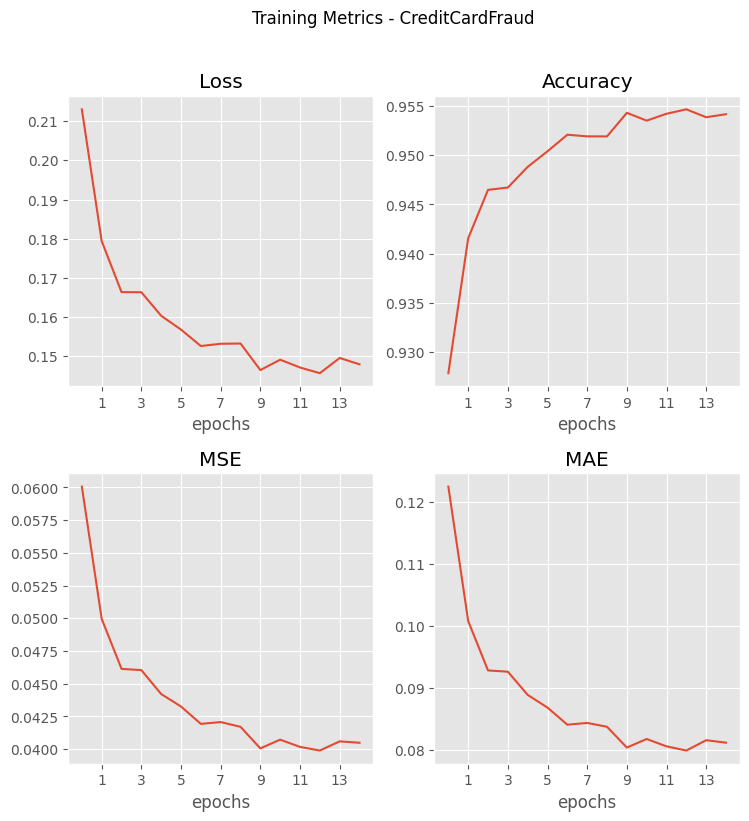

In [ ]:
plot_training_history(training_history_ANN, file_name='CreditCardFraud')

In [ ]:
print(f'Detailed Training Results of {MODEL_NAME_ANN} model')
y_pred_1hot_ann = model_ANN.predict(X_test)
y_pred_ann = np.argmax(y_pred_1hot_ann, axis = 1)
conf_matrix_and_classification_report(y_test, y_pred_ann, class_names=CLASS_NAMES)

Detailed Training Results of ANN model
1093/1093 [==============================] - 2s 2ms/step
Valid: [16966   420]
Fraud: [ 1164 16412]
-----------------------------------------------------
              precision    recall  f1-score   support

       Valid       0.94      0.98      0.96     17386
       Fraud       0.98      0.93      0.95     17576

    accuracy                           0.95     34962
   macro avg       0.96      0.95      0.95     34962
weighted avg       0.96      0.95      0.95     34962



In [ ]:
acc_history = training_history_ANN.history['accuracy']
er_com.loc[len(er_com.index)] = ['ANN3',accuracy_score(y_test, y_pred_ann),precision_score(y_test, y_pred_ann),recall_score(y_test, y_pred_ann),f1_score(y_test, y_pred_ann)]



Conclusion



In [ ]:
er_com

,Method Name,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.911533,0.919141,0.903505,0.911256
1,Decision Tree,0.960471,0.988301,0.932408,0.959541
2,K-NN,0.951347,0.972161,0.929848,0.950534
3,Random Forest,0.960643,0.988481,0.932579,0.959717
4,ANN1,0.953693,0.974769,0.932010,0.952910
5,ANN2,0.952720,0.970788,0.934058,0.952069
6,ANN3,0.954694,0.975048,0.933773,0.953964


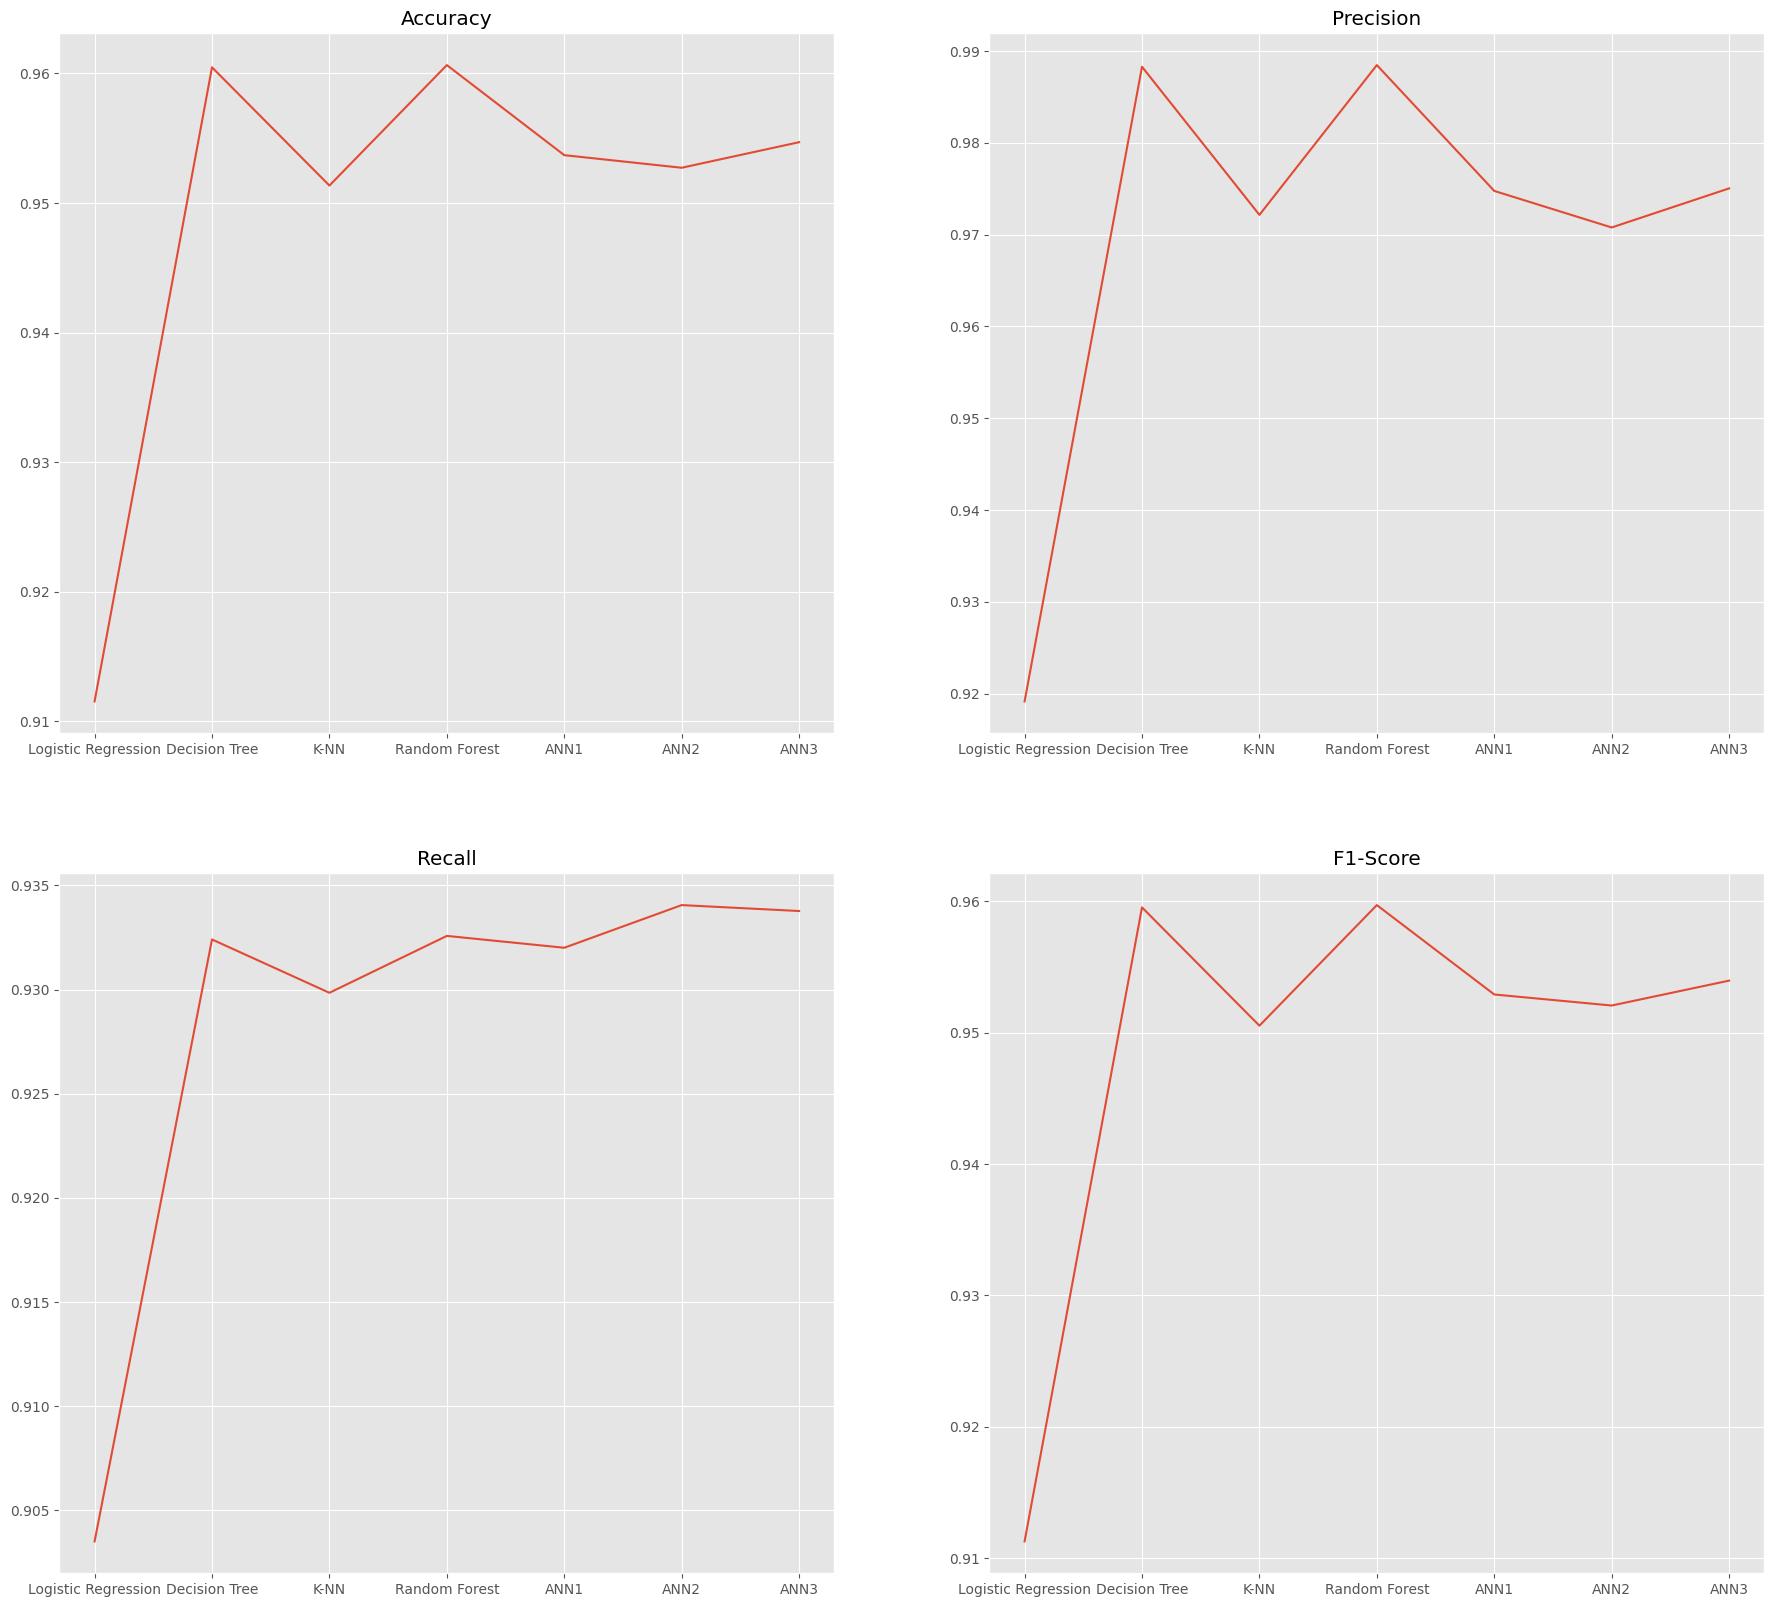

In [ ]:
plt.figure(figsize=(22,20))
plt.subplot(2,2,1)
plt.title("Accuracy")
plt.plot(er_com["Method Name"],er_com["Accuracy"])
plt.subplot(2,2,2)
plt.title("Precision")
plt.plot(er_com["Method Name"],er_com["Precision"])
plt.subplot(2,2,3)
plt.title("Recall")
plt.plot(er_com["Method Name"],er_com["Recall"])
plt.subplot(2,2,4)
plt.title("F1-Score")
plt.plot(er_com["Method Name"],er_com["F1-Score"])
plt.show()